# The Sparks Foundation

<b>GRIP Program</b>

## Task1: Predicting the percentage of an student based on the no. of study hours.

<b>We will use simple Linear Regression with Python sklearn for this Task</b>

Importing requried libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading data from remote link.

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

Understanding the data.

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Checking for null values

In [6]:
data.isna().any()

Hours     False
Scores    False
dtype: bool

Checking descriptive statistics and five number summary

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


<b>Scatter plot of student_score vs number_of_hours_studied

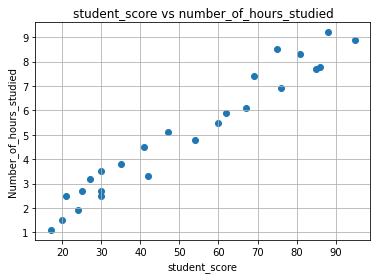

In [8]:
plt.scatter(data['Scores'],data['Hours'])
plt.grid()
plt.title('student_score vs number_of_hours_studied')
plt.xlabel('student_score')
plt.ylabel('Number_of_hours_studied')
plt.show()

## Taking x and y variables

In [9]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## Spliting of variables

importing train_test_split library from sklearn.model_selection

In [10]:
from sklearn.model_selection import train_test_split

spliting the variables with test_size = 0.2

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [12]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [13]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [14]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [15]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [16]:
print(x_train.shape)
print(x_test.shape)

(20, 1)
(5, 1)


In [17]:
print(y_train.shape)
print(y_test.shape)

(20,)
(5,)


## Creating Linear Regression Model

<b>importing LinerRegression library from sklearn.linear_model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

<b>Training the model

In [20]:
model.fit(x_train,y_train)

LinearRegression()

<b>Predicting the score 

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

<b>comparing actual score with predicted score

In [23]:
df = pd.DataFrame({'Hours':x_test.flatten(),'Actual_score':y_test, 'Predicted_score':y_pred})

In [24]:
df

,Hours,Actual_score,Predicted_score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


<b>Ploting the line of best fit for our Linear Regression model.

<pre>The equation of line is y = b1x + b0 for simple Linear Regression 
           where <b>b1</b> refers to <b>coefficient</b> and <b>b0</b> refers to <b>intercept.</b></pre>

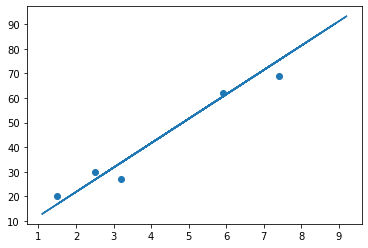

In [25]:
line = model.coef_*x+model.intercept_
# Plotting for the test data
plt.scatter(x_test, y_test)
plt.plot(x, line);
plt.show()

<b>Now, predicting score for No.of hours = 9.25

In [26]:
h = [[9.25]]
score = model.predict(h)

In [27]:
score

array([93.69173249])

<b><i>So, for No.of hours = <u>9.25</u> the predicted score will be <u>93.69173249</u></i></b>

<b> Calculating Mean Absolute Error

In [28]:
from sklearn.metrics import mean_absolute_error  
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


<b> Calculating Mean Square Error

In [29]:
from sklearn.metrics import mean_squared_error
print('Mean Square Error:',mean_squared_error(y_test, y_pred))

Mean Square Error: 21.5987693072174
